In [ ]:
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt

import seaborn as sns
plt.style.use('seaborn-whitegrid')

# import missingno


# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')


In [2]:

# Import train & test data 
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv') # example of what a submission should look like

In [3]:
# View the training data
train.head(15)

PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   
11           12         1       1   
12           13         0       3   
13           14         0       3   
14           15         0       3   

                                                 Name     Sex   Age  SibSp  \
0                             Braund, Mr. Owen Harris    male  22.0      1   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                              Heikkinen, Miss. Laina  female  26.0      0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                            Allen, Mr. William Henry    male  35.0      0   
5                                    Moran, Mr. James    male   NaN      0   
6                             McCarthy, Mr. Timothy J    male  54.0      0   
7                      Palsson, Master. Gosta Leonard    male   2.0      3   
8   Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                 Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
10                    Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                           Bonnell, Miss. Elizabeth  female  58.0      0   
12                     Saundercock, Mr. William Henry    male  20.0      0   
13                        Andersson, Mr. Anders Johan    male  39.0      1   
14               Vestrom, Miss. Hulda Amanda Adolfina  female  14.0      0   

    Parch            Ticket     Fare Cabin Embarked  
0       0         A/5 21171   7.2500   NaN        S  
1       0          PC 17599  71.2833   C85        C  
2       0  STON/O2. 3101282   7.9250   NaN        S  
3       0            113803  53.1000  C123        S  
4       0            373450   8.0500   NaN        S  
5       0            330877   8.4583   NaN        Q  
6       0             17463  51.8625   E46        S  
7       1            349909  21.0750   NaN        S  
8       2            347742  11.1333   NaN        S  
9       0            237736  30.0708   NaN        C  
10      1           PP 9549  16.7000    G6        S  
11      0            113783  26.5500  C103        S  
12      0         A/5. 2151   8.0500   NaN        S  
13      5            347082  31.2750   NaN        S  
14      0            350406   7.8542   NaN        S

In [4]:
len(train)

891

In [5]:

# View the test data (same columns as the training data)
test.head() # head = view first 5 lines

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [6]:
len(test)

418

In [7]:
# View the example submisison dataframe
gender_submission.head()

PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

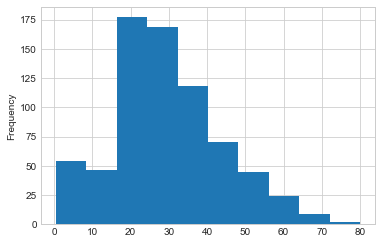

In [8]:
train.Age.plot.hist()


In [9]:
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

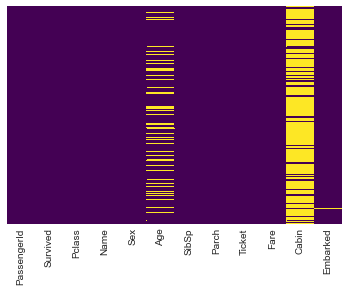

In [10]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap="viridis")

In [11]:
# Alternatively, to see the number of missing values like this
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
# created 2 DataFrame
df_bin = pd.DataFrame() # for discretised continuous variables
df_con = pd.DataFrame() # for continuous variables


In [13]:
# Different data types in the dataset
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### survived data


0    549
1    342
Name: Survived, dtype: int64


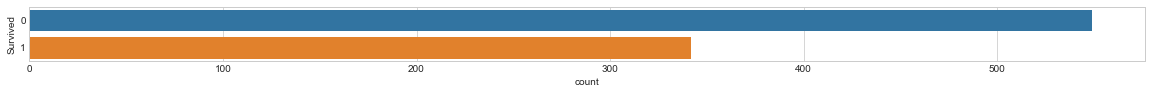

In [14]:
# How many people survived?
fig = plt.figure(figsize=(20,1))
sns.countplot(y='Survived', data=train);
print(train.Survived.value_counts())

In [15]:
#data ----> dataFrames

# Let's add this to our subset dataframes
df_bin['Survived'] = train['Survived']
df_con['Survived'] = train['Survived']

In [16]:
df_bin

Survived
0           0
1           1
2           1
3           1
4           0
..        ...
886         0
887         1
888         0
889         1
890         0

[891 rows x 1 columns]

In [17]:
df_con

Survived
0           0
1           1
2           1
3           1
4           0
..        ...
886         0
887         1
888         0
889         1
890         0

[891 rows x 1 columns]

### Feature: Pclass
Description: The ticket class of the passenger.

Key: 1 = 1st, 2 = 2nd, 3 = 3rd

Let's plot the distribution

For example, if there are values which are completely outside of the distribution, we may not want to include them in our model.

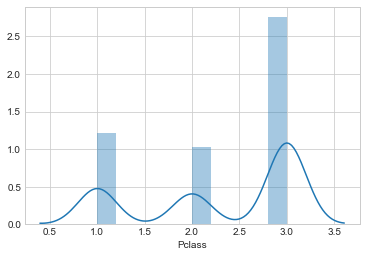

In [18]:
sns.distplot(train.Pclass)

In [19]:
# How many missing variables does Pclass have?
train.Pclass.isnull().sum()

0

In [20]:
#Since there are no missing values in Pclass, let's add it to our sub dataframes.
df_bin['Pclass'] = train['Pclass']
df_con['Pclass'] = train['Pclass']

### Feature: Names

In [21]:
#Name of Pasengers 
# How many different names are there?
train.Name.value_counts()

Ibrahim Shawah, Mr. Yousseff       1
Sage, Mr. Frederick                1
West, Miss. Constance Mirium       1
Dean, Mr. Bertram Frank            1
Campbell, Mr. William              1
                                  ..
Ilett, Miss. Bertha                1
Hagland, Mr. Ingvald Olai Olsen    1
Baclini, Miss. Eugenie             1
Douglas, Mr. Walter Donald         1
Mamee, Mr. Hanna                   1
Name: Name, Length: 891, dtype: int64

In [22]:
len(train)

891

In [23]:
# no.of rows = no. of people

### Feature : Sex

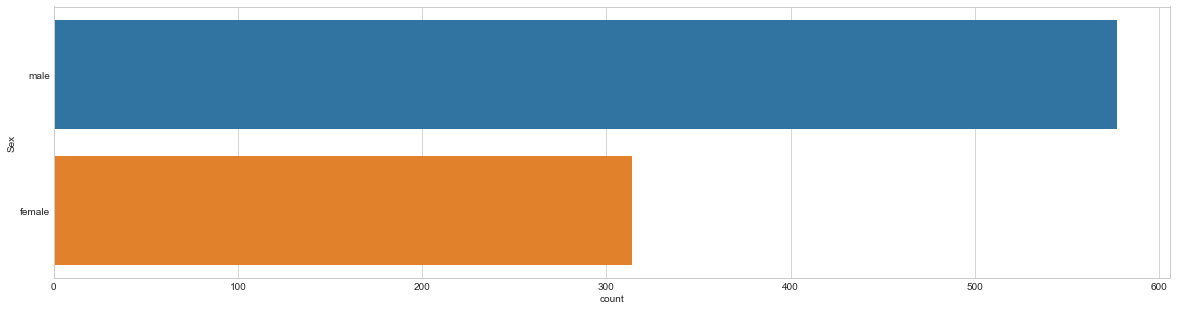

In [24]:
# Let's view the distribution of Sex
plt.figure(figsize=(20, 5))
sns.countplot(y="Sex", data=train)

In [25]:
train.Sex.isnull().sum()

0

In [26]:
# add Sex to the subset dataframes
#since 0 mssing value in Sex column
df_bin['Sex'] = train['Sex']
df_bin['Sex'] = np.where(df_bin['Sex'] == 'female', 1, 0) # change sex to 0 for male and 1 for female

df_con['Sex'] = train['Sex']

In [27]:
df_bin

Survived  Pclass  Sex
0           0       3    0
1           1       1    1
2           1       3    1
3           1       1    1
4           0       3    0
..        ...     ...  ...
886         0       2    0
887         1       1    1
888         0       3    1
889         1       1    0
890         0       3    0

[891 rows x 3 columns]

In [28]:
df_con

Survived  Pclass     Sex
0           0       3    male
1           1       1  female
2           1       3  female
3           1       1  female
4           0       3    male
..        ...     ...     ...
886         0       2    male
887         1       1  female
888         0       3  female
889         1       1    male
890         0       3    male

[891 rows x 3 columns]

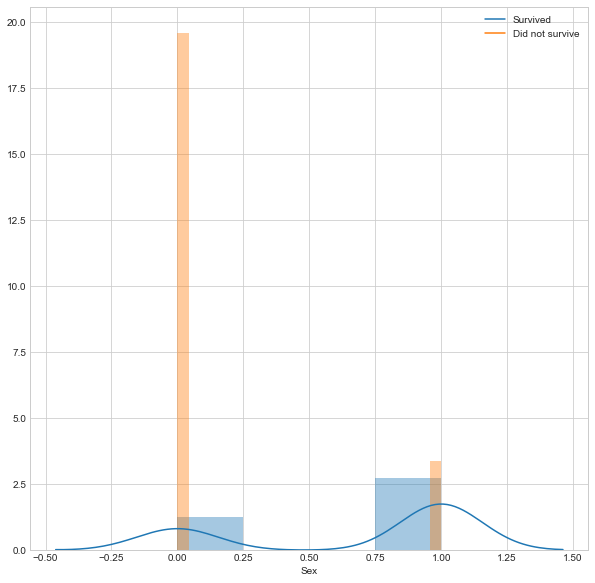

In [29]:

# How does the Sex variable look compared to Survival?
# We can see this because they're both binarys.
fig = plt.figure(figsize=(10, 10))
sns.distplot(df_bin.loc[df_bin['Survived'] == 1]['Sex'], kde_kws={'label': 'Survived'});
sns.distplot(df_bin.loc[df_bin['Survived'] == 0]['Sex'], kde_kws={'label': 'Did not survive'});

#### Function to create count and distribution visualisations

In [30]:
def plot_count_dist(data, bin_df, label_column, target_column, figsize=(20, 5), use_bin_df=False):
    """
    Function to plot counts and distributions of a label variable and 
    target variable side by side.
    ::param_data:: = target dataframe
    ::param_bin_df:: = binned dataframe for countplot
    ::param_label_column:: = binary labelled column
    ::param_target_column:: = column you want to view counts and distributions
    ::param_figsize:: = size of figure (width, height)
    ::param_use_bin_df:: = whether or not to use the bin_df, default False
    """
    if use_bin_df: 
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=bin_df);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});
    else:
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=data);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});


### Feature : Age

In [31]:


# How many missing values does age have?
train.Age.isnull().sum()

177

In [32]:
#train['Age'].fillna(train['Age'].median(), inplace = True)
train.loc[(train['Age'].isnull() == True), 'Age'] = train['Age'].mean()

# Once the Age values have been fixed up, we can add them to our sub dataframes.
df_bin['Age'] = pd.cut(train['Age'], 10) # bucketed/binned into different categories
df_con['Age'] = train['Age'] # non-bucketed

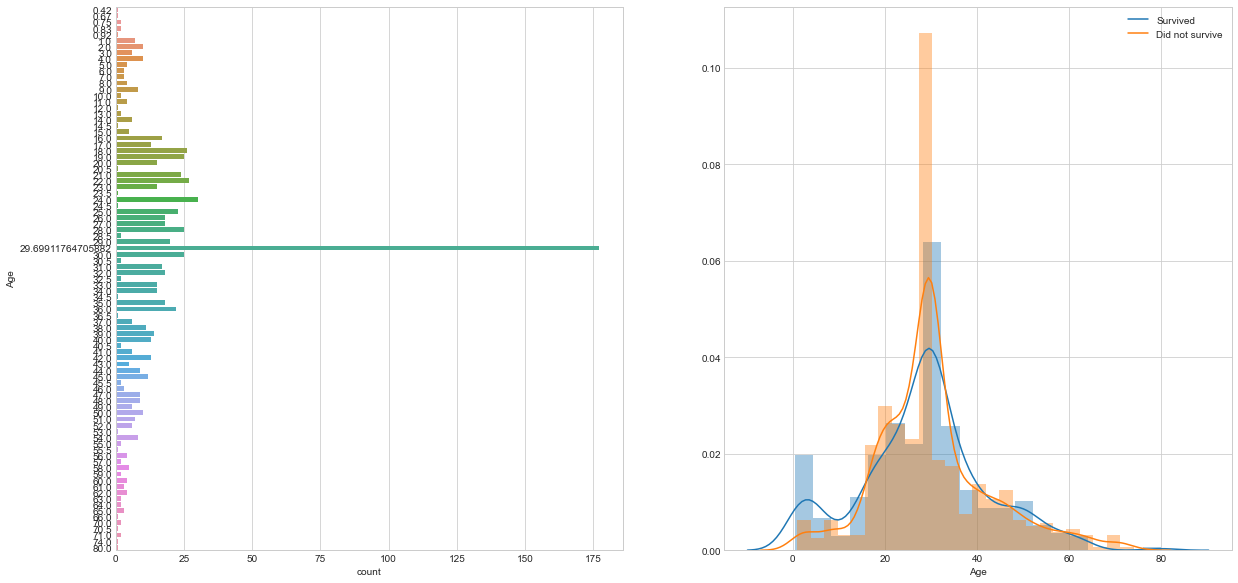

In [33]:
# Visualise the counts of Age and the distribution of the values
# against Survived
plot_count_dist(train, 
                bin_df=df_bin,
                label_column='Survived', 
                target_column='Age', 
                figsize=(20, 10))

### Feature: SibSp

In [34]:

# How many missing values does SibSp have?
train.SibSp.isnull().sum()

0

In [35]:

# What values are there?
train.SibSp.value_counts()


0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [36]:

# Add SibSp to subset dataframes
df_bin['SibSp'] = train['SibSp']
df_con['SibSp'] = train['SibSp']

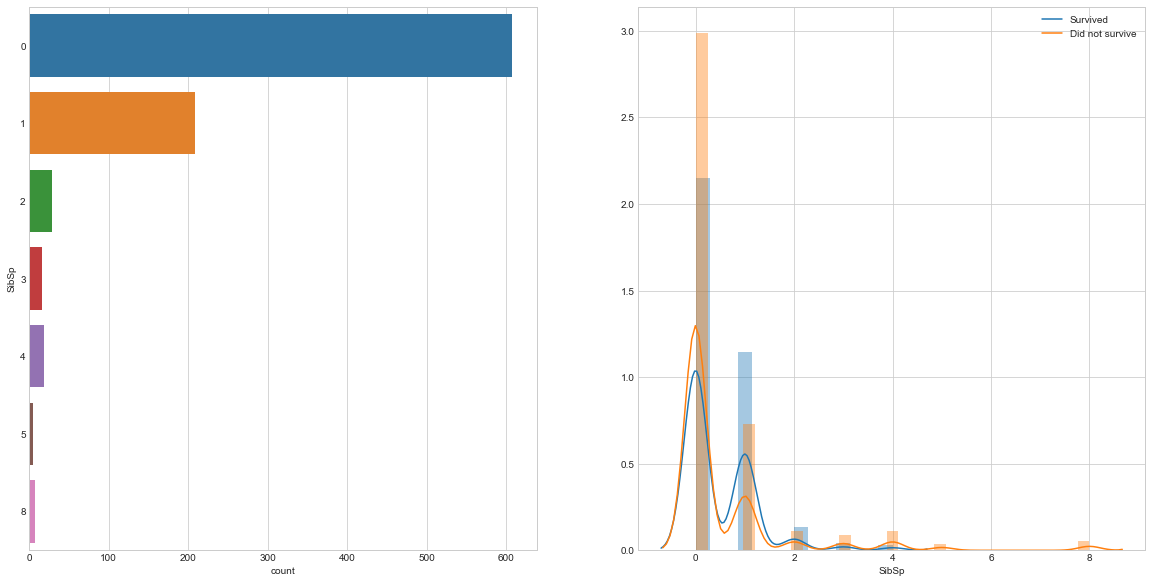

In [37]:
# Visualise the counts of SibSp and the distribution of the values
# against Survived
plot_count_dist(train, 
                bin_df=df_bin, 
                label_column='Survived', 
                target_column='SibSp', 
                figsize=(20, 10))

### Feature: Parch


In [38]:
# How many missing values does Parch have?
train.Parch.isnull().sum()

0

In [39]:
# What values are there?
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [40]:

# Add Parch to subset dataframes
df_bin['Parch'] = train['Parch']
df_con['Parch'] = train['Parch']

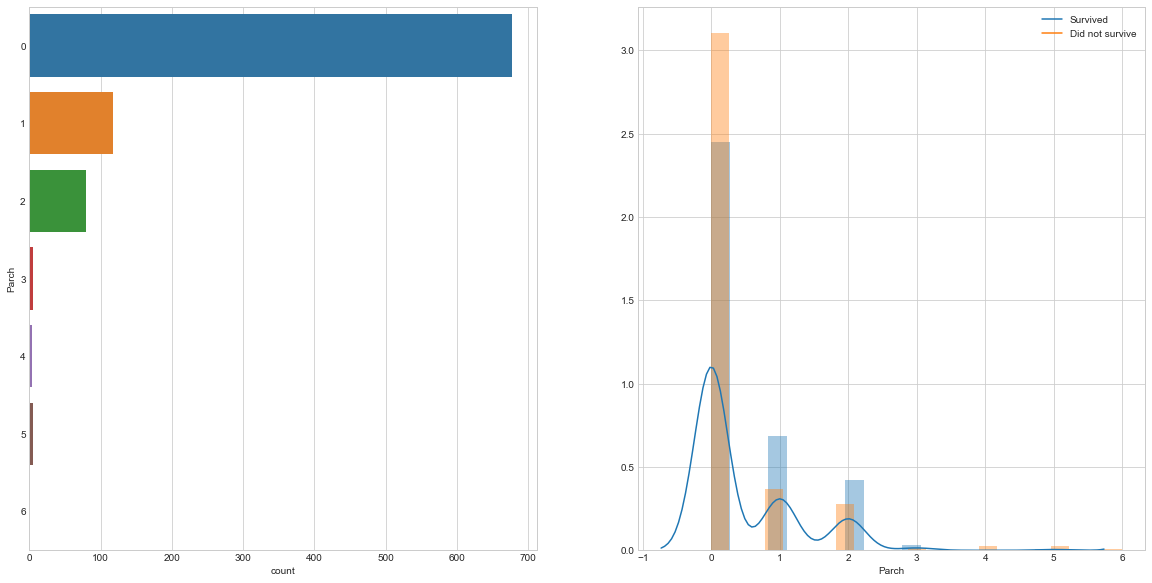

In [41]:
# Visualise the counts of Parch and the distribution of the values
# against Survived
plot_count_dist(train, 
                bin_df=df_bin,
                label_column='Survived', 
                target_column='Parch', 
                figsize=(20, 10))

In [42]:

train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [43]:
df_con.head()

Survived  Pclass     Sex   Age  SibSp  Parch
0         0       3    male  22.0      1      0
1         1       1  female  38.0      1      0
2         1       3  female  26.0      0      0
3         1       1  female  35.0      1      0
4         0       3    male  35.0      0      0

In [44]:
df_bin.head()

Survived  Pclass  Sex               Age  SibSp  Parch
0         0       3    0  (16.336, 24.294]      1      0
1         1       1    1   (32.252, 40.21]      1      0
2         1       3    1  (24.294, 32.252]      0      0
3         1       1    1   (32.252, 40.21]      1      0
4         0       3    0   (32.252, 40.21]      0      0

### Feature: Ticket

In [45]:
# How many missing values does Ticket have?
train.Ticket.isnull().sum()

0

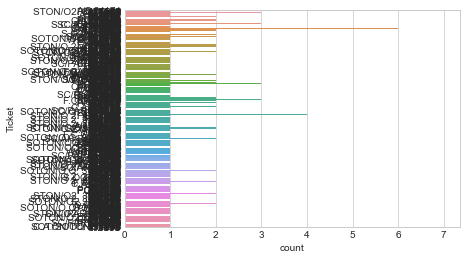

In [46]:
# How many kinds of ticket are there?
sns.countplot(y="Ticket", data=train)

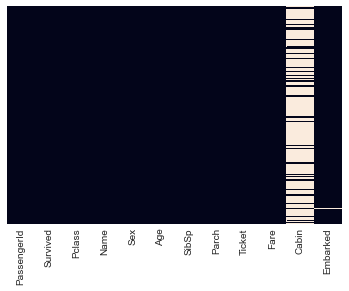

In [47]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False)

In [48]:

# How many kinds of ticket are there?
pd.set_option('max_rows', None)
train.Ticket.value_counts()

347082                7
CA. 2343              7
1601                  7
3101295               6
CA 2144               6
347088                6
S.O.C. 14879          5
382652                5
17421                 4
19950                 4
PC 17757              4
2666                  4
LINE                  4
347077                4
4133                  4
349909                4
113760                4
113781                4
W./C. 6608            4
35273                 3
F.C.C. 13529          3
345773                3
PC 17755              3
110413                3
248727                3
230080                3
363291                3
13502                 3
347742                3
C.A. 34651            3
239853                3
371110                3
PC 17572              3
24160                 3
PC 17582              3
C.A. 31921            3
SC/Paris 2123         3
29106                 3
110152                3
PC 17760              3
2627                  2
A/4 48871       

In [49]:
# How many unique kinds of Ticket are there?
print("There are {} unique Ticket values.".format(len(train.Ticket.unique())))

There are 681 unique Ticket values.


### Feature: Fare

In [50]:
# How many missing values does Fare have?
train.Fare.isnull().sum()

0

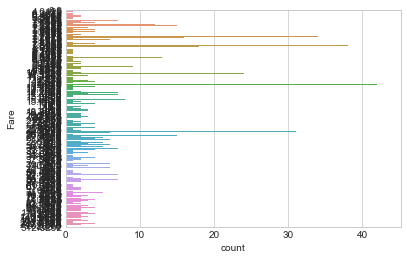

In [51]:

# How many different values of Fare are there?
sns.countplot(y="Fare", data=train);

In [52]:
# What kind of variable is Fare?
train.Fare.dtype

dtype('float64')

In [53]:
# How many unique kinds of Fare are there?
print("There are {} unique Fare values.".format(len(train.Fare.unique())))

There are 248 unique Fare values.


In [54]:

# Add Fare to sub dataframes
df_con['Fare'] = train['Fare'] 
df_bin['Fare'] = pd.cut(train['Fare'], bins=5) # discretised

In [55]:

# What do our Fare bins look like?
df_bin.Fare.value_counts()

(-0.512, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: Fare, dtype: int64

In [56]:
df_bin.head()

Survived  Pclass  Sex               Age  SibSp  Parch               Fare
0         0       3    0  (16.336, 24.294]      1      0  (-0.512, 102.466]
1         1       1    1   (32.252, 40.21]      1      0  (-0.512, 102.466]
2         1       3    1  (24.294, 32.252]      0      0  (-0.512, 102.466]
3         1       1    1   (32.252, 40.21]      1      0  (-0.512, 102.466]
4         0       3    0   (32.252, 40.21]      0      0  (-0.512, 102.466]

In [57]:
df_con.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare
0         0       3    male  22.0      1      0   7.2500
1         1       1  female  38.0      1      0  71.2833
2         1       3  female  26.0      0      0   7.9250
3         1       1  female  35.0      1      0  53.1000
4         0       3    male  35.0      0      0   8.0500

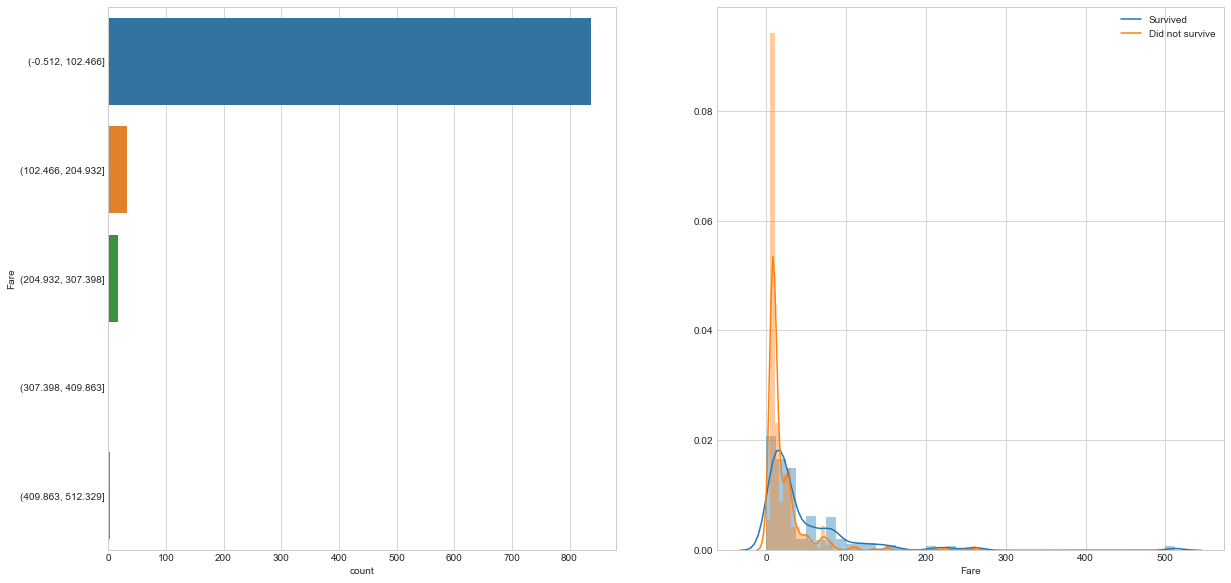

In [58]:
# Visualise the Fare bin counts as well as the Fare distribution versus Survived.
plot_count_dist(data=train,
                bin_df=df_bin,
                label_column='Survived', 
                target_column='Fare', 
                figsize=(20,10), 
                use_bin_df=True)

### Feature: Cabin

In [59]:
# How many missing values does Cabin have?
train.Cabin.isnull().sum()

687

In [60]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [61]:
# What do the Cabin values look like?
train.Cabin.value_counts()

G6                 4
B96 B98            4
C23 C25 C27        4
F33                3
E101               3
C22 C26            3
F2                 3
D                  3
B18                2
B58 B60            2
E44                2
C83                2
C125               2
E25                2
C93                2
B77                2
C52                2
D17                2
D35                2
C65                2
D26                2
E33                2
E8                 2
D33                2
E121               2
B22                2
B5                 2
E67                2
C92                2
B49                2
B57 B59 B63 B66    2
F G73              2
D36                2
B20                2
B28                2
C123               2
F4                 2
B51 B53 B55        2
C126               2
D20                2
E24                2
C68                2
B35                2
C124               2
C78                2
C2                 2
E36                1
B79          

### Feature: Embarked

In [62]:
# How many missing values does Embarked have?
train.Embarked.isnull().sum()

2

In [63]:
# What kind of values are in Embarked?
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

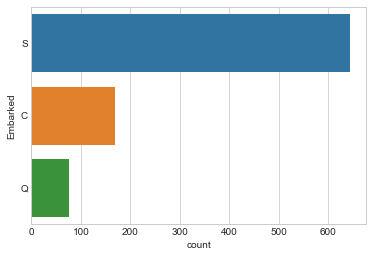

In [64]:
# What do the counts look like?
sns.countplot(y='Embarked', data=train);

In [65]:
# Add Embarked to sub dataframes
df_bin['Embarked'] = train['Embarked']
df_con['Embarked'] = train['Embarked']

In [66]:
# Remove Embarked rows which are missing values
print(len(df_con))
df_con = df_con.dropna(subset=['Embarked'])
df_bin = df_bin.dropna(subset=['Embarked'])
print(len(df_con))

891
889


### Feature: Encoding

#### converting values into binary ( df_bin, df_con)

In [67]:
df_bin

Survived  Pclass  Sex               Age  SibSp  Parch  \
0           0       3    0  (16.336, 24.294]      1      0   
1           1       1    1   (32.252, 40.21]      1      0   
2           1       3    1  (24.294, 32.252]      0      0   
3           1       1    1   (32.252, 40.21]      1      0   
4           0       3    0   (32.252, 40.21]      0      0   
5           0       3    0  (24.294, 32.252]      0      0   
6           0       1    0  (48.168, 56.126]      0      0   
7           0       3    0     (0.34, 8.378]      3      1   
8           1       3    1  (24.294, 32.252]      0      2   
9           1       2    1   (8.378, 16.336]      1      0   
10          1       3    1     (0.34, 8.378]      1      1   
11          1       1    1  (56.126, 64.084]      0      0   
12          0       3    0  (16.336, 24.294]      0      0   
13          0       3    0   (32.252, 40.21]      1      5   
14          0       3    1   (8.378, 16.336]      0      0   
15          1       2    1  (48.168, 56.126]      0      0   
16          0       3    0     (0.34, 8.378]      4      1   
17          1       2    0  (24.294, 32.252]      0      0   
18          0       3    1  (24.294, 32.252]      1      0   
19          1       3    1  (24.294, 32.252]      0      0   
20          0       2    0   (32.252, 40.21]      0      0   
21          1       2    0   (32.252, 40.21]      0      0   
22          1       3    1   (8.378, 16.336]      0      0   
23          1       1    0  (24.294, 32.252]      0      0   
24          0       3    1     (0.34, 8.378]      3      1   
25          1       3    1   (32.252, 40.21]      1      5   
26          0       3    0  (24.294, 32.252]      0      0   
27          0       1    0  (16.336, 24.294]      3      2   
28          1       3    1  (24.294, 32.252]      0      0   
29          0       3    0  (24.294, 32.252]      0      0   
30          0       1    0   (32.252, 40.21]      0      0   
31          1       1    1  (24.294, 32.252]      1      0   
32          1       3    1  (24.294, 32.252]      0      0   
33          0       2    0  (64.084, 72.042]      0      0   
34          0       1    0  (24.294, 32.252]      1      0   
35          0       1    0   (40.21, 48.168]      1      0   
36          1       3    0  (24.294, 32.252]      0      0   
37          0       3    0  (16.336, 24.294]      0      0   
38          0       3    1  (16.336, 24.294]      2      0   
39          1       3    1   (8.378, 16.336]      1      0   
40          0       3    1   (32.252, 40.21]      1      0   
41          0       2    1  (24.294, 32.252]      1      0   
42          0       3    0  (24.294, 32.252]      0      0   
43          1       2    1     (0.34, 8.378]      1      2   
44          1       3    1  (16.336, 24.294]      0      0   
45          0       3    0  (24.294, 32.252]      0      0   
46          0       3    0  (24.294, 32.252]      1      0   
47          1       3    1  (24.294, 32.252]      0      0   
48          0       3    0  (24.294, 32.252]      2      0   
49          0       3    1  (16.336, 24.294]      1      0   
50          0       3    0     (0.34, 8.378]      4      1   
51          0       3    0  (16.336, 24.294]      0      0   
52          1       1    1  (48.168, 56.126]      1      0   
53          1       2    1  (24.294, 32.252]      1      0   
54          0       1    0  (64.084, 72.042]      0      1   
55          1       1    0  (24.294, 32.252]      0      0   
56          1       2    1  (16.336, 24.294]      0      0   
57          0       3    0  (24.294, 32.252]      0      0   
58          1       2    1     (0.34, 8.378]      1      2   
59          0       3    0   (8.378, 16.336]      5      2   
60          0       3    0  (16.336, 24.294]      0      0   
62          0       1    0   (40.21, 48.168]      1      0   
63          0       3    0     (0.34, 8.378]      3      2   
64          0       1    0  (24.294, 

In [68]:
df_con

Survived  Pclass     Sex        Age  SibSp  Parch      Fare Embarked
0           0       3    male  22.000000      1      0    7.2500        S
1           1       1  female  38.000000      1      0   71.2833        C
2           1       3  female  26.000000      0      0    7.9250        S
3           1       1  female  35.000000      1      0   53.1000        S
4           0       3    male  35.000000      0      0    8.0500        S
5           0       3    male  29.699118      0      0    8.4583        Q
6           0       1    male  54.000000      0      0   51.8625        S
7           0       3    male   2.000000      3      1   21.0750        S
8           1       3  female  27.000000      0      2   11.1333        S
9           1       2  female  14.000000      1      0   30.0708        C
10          1       3  female   4.000000      1      1   16.7000        S
11          1       1  female  58.000000      0      0   26.5500        S
12          0       3    male  20.000000      0      0    8.0500        S
13          0       3    male  39.000000      1      5   31.2750        S
14          0       3  female  14.000000      0      0    7.8542        S
15          1       2  female  55.000000      0      0   16.0000        S
16          0       3    male   2.000000      4      1   29.1250        Q
17          1       2    male  29.699118      0      0   13.0000        S
18          0       3  female  31.000000      1      0   18.0000        S
19          1       3  female  29.699118      0      0    7.2250        C
20          0       2    male  35.000000      0      0   26.0000        S
21          1       2    male  34.000000      0      0   13.0000        S
22          1       3  female  15.000000      0      0    8.0292        Q
23          1       1    male  28.000000      0      0   35.5000        S
24          0       3  female   8.000000      3      1   21.0750        S
25          1       3  female  38.000000      1      5   31.3875        S
26          0       3    male  29.699118      0      0    7.2250        C
27          0       1    male  19.000000      3      2  263.0000        S
28          1       3  female  29.699118      0      0    7.8792        Q
29          0       3    male  29.699118      0      0    7.8958        S
30          0       1    male  40.000000      0      0   27.7208        C
31          1       1  female  29.699118      1      0  146.5208        C
32          1       3  female  29.699118      0      0    7.7500        Q
33          0       2    male  66.000000      0      0   10.5000        S
34          0       1    male  28.000000      1      0   82.1708        C
35          0       1    male  42.000000      1      0   52.0000        S
36          1       3    male  29.699118      0      0    7.2292        C
37          0       3    male  21.000000      0      0    8.0500        S
38          0       3  female  18.000000      2      0   18.0000        S
39          1       3  female  14.000000      1      0   11.2417        C
40          0       3  female  40.000000      1      0    9.4750        S
41          0       2  female  27.000000      1      0   21.0000        S
42          0       3    male  29.699118      0      0    7.8958        C
43          1       2  female   3.000000      1      2   41.5792        C
44          1       3  female  19.000000      0      0    7.8792        Q
45          0       3    male  29.699118      0      0    8.0500        S
46          0       3    male  29.699118      1      0   15.5000        Q
47          1       3  female  29.699118      0      0    7.7500        Q
48          0       3    male  29.699118      2      0   21.6792        C
49          0       3  female  18.000000      1      0   17.8000        S
50          0       3    male   7.000000      4      1   39.6875        S
51          0       3    male  21.000000      0      0    7.8000        S
52          1       1  female  49.000000      1      0   76.7292        C
53       

In [69]:
# One-hot encode binned variables
one_hot_cols = df_bin.columns.tolist()
one_hot_cols.remove('Survived')
df_bin_enc = pd.get_dummies(df_bin, columns=one_hot_cols)

df_bin_enc

Survived  Pclass_1  Pclass_2  Pclass_3  Sex_0  Sex_1  Age_(0.34, 8.378]  \
0           0         0         0         1      1      0                  0   
1           1         1         0         0      0      1                  0   
2           1         0         0         1      0      1                  0   
3           1         1         0         0      0      1                  0   
4           0         0         0         1      1      0                  0   
5           0         0         0         1      1      0                  0   
6           0         1         0         0      1      0                  0   
7           0         0         0         1      1      0                  1   
8           1         0         0         1      0      1                  0   
9           1         0         1         0      0      1                  0   
10          1         0         0         1      0      1                  1   
11          1         1         0         0      0      1                  0   
12          0         0         0         1      1      0                  0   
13          0         0         0         1      1      0                  0   
14          0         0         0         1      0      1                  0   
15          1         0         1         0      0      1                  0   
16          0         0         0         1      1      0                  1   
17          1         0         1         0      1      0                  0   
18          0         0         0         1      0      1                  0   
19          1         0         0         1      0      1                  0   
20          0         0         1         0      1      0                  0   
21          1         0         1         0      1      0                  0   
22          1         0         0         1      0      1                  0   
23          1         1         0         0      1      0                  0   
24          0         0         0         1      0      1                  1   
25          1         0         0         1      0      1                  0   
26          0         0         0         1      1      0                  0   
27          0         1         0         0      1      0                  0   
28          1         0         0         1      0      1                  0   
29          0         0         0         1      1      0                  0   
30          0         1         0         0      1      0                  0   
31          1         1         0         0      0      1                  0   
32          1         0         0         1      0      1                  0   
33          0         0         1         0      1      0                  0   
34          0         1         0         0      1      0                  0   
35          0         1         0         0      1      0                  0   
36          1         0         0         1      1      0                  0   
37          0         0         0         1      1      0                  0   
38          0         0         0         1      0      1                  0   
39          1         0         0         1      0      1                  0   
40          0         0         0         1      0      1                  0   
41          0         0         1         0      0      1                  0   
42          0         0         0         1      1      0                  0   
43          1         0         1         0      0      1                  1   
44          1         0         0         1      0      1                  0   
45          0         0         0         1      1      0                  0   
46          0         0         0         1      1      0                  0   
47          1         0         0         1      0      1                  0   
48          0         0         0         1      1      0                  0   
49   

In [70]:
df_con

Survived  Pclass     Sex        Age  SibSp  Parch      Fare Embarked
0           0       3    male  22.000000      1      0    7.2500        S
1           1       1  female  38.000000      1      0   71.2833        C
2           1       3  female  26.000000      0      0    7.9250        S
3           1       1  female  35.000000      1      0   53.1000        S
4           0       3    male  35.000000      0      0    8.0500        S
5           0       3    male  29.699118      0      0    8.4583        Q
6           0       1    male  54.000000      0      0   51.8625        S
7           0       3    male   2.000000      3      1   21.0750        S
8           1       3  female  27.000000      0      2   11.1333        S
9           1       2  female  14.000000      1      0   30.0708        C
10          1       3  female   4.000000      1      1   16.7000        S
11          1       1  female  58.000000      0      0   26.5500        S
12          0       3    male  20.000000      0      0    8.0500        S
13          0       3    male  39.000000      1      5   31.2750        S
14          0       3  female  14.000000      0      0    7.8542        S
15          1       2  female  55.000000      0      0   16.0000        S
16          0       3    male   2.000000      4      1   29.1250        Q
17          1       2    male  29.699118      0      0   13.0000        S
18          0       3  female  31.000000      1      0   18.0000        S
19          1       3  female  29.699118      0      0    7.2250        C
20          0       2    male  35.000000      0      0   26.0000        S
21          1       2    male  34.000000      0      0   13.0000        S
22          1       3  female  15.000000      0      0    8.0292        Q
23          1       1    male  28.000000      0      0   35.5000        S
24          0       3  female   8.000000      3      1   21.0750        S
25          1       3  female  38.000000      1      5   31.3875        S
26          0       3    male  29.699118      0      0    7.2250        C
27          0       1    male  19.000000      3      2  263.0000        S
28          1       3  female  29.699118      0      0    7.8792        Q
29          0       3    male  29.699118      0      0    7.8958        S
30          0       1    male  40.000000      0      0   27.7208        C
31          1       1  female  29.699118      1      0  146.5208        C
32          1       3  female  29.699118      0      0    7.7500        Q
33          0       2    male  66.000000      0      0   10.5000        S
34          0       1    male  28.000000      1      0   82.1708        C
35          0       1    male  42.000000      1      0   52.0000        S
36          1       3    male  29.699118      0      0    7.2292        C
37          0       3    male  21.000000      0      0    8.0500        S
38          0       3  female  18.000000      2      0   18.0000        S
39          1       3  female  14.000000      1      0   11.2417        C
40          0       3  female  40.000000      1      0    9.4750        S
41          0       2  female  27.000000      1      0   21.0000        S
42          0       3    male  29.699118      0      0    7.8958        C
43          1       2  female   3.000000      1      2   41.5792        C
44          1       3  female  19.000000      0      0    7.8792        Q
45          0       3    male  29.699118      0      0    8.0500        S
46          0       3    male  29.699118      1      0   15.5000        Q
47          1       3  female  29.699118      0      0    7.7500        Q
48          0       3    male  29.699118      2      0   21.6792        C
49          0       3  female  18.000000      1      0   17.8000        S
50          0       3    male   7.000000      4      1   39.6875        S
51          0       3    male  21.000000      0      0    7.8000        S
52          1       1  female  49.000000      1      0   76.7292        C
53       

In [71]:

# One hot encode the categorical columns
df_embarked_one_hot = pd.get_dummies(df_con['Embarked'], 
                                     prefix='embarked')

df_sex_one_hot = pd.get_dummies(df_con['Sex'], 
                                prefix='sex')

df_plcass_one_hot = pd.get_dummies(df_con['Pclass'], 
                                   prefix='pclass')

In [72]:
# Combine the one hot encoded columns with df_con_enc
df_con_enc = pd.concat([df_con, 
                        df_embarked_one_hot, 
                        df_sex_one_hot, 
                        df_plcass_one_hot], axis=1)

# Drop the original categorical columns (because now they've been one hot encoded)
df_con_enc = df_con_enc.drop(['Pclass', 'Sex', 'Embarked'], axis=1)

In [73]:
# Let's look at df_con_enc
df_con_enc.head(20)

Survived        Age  SibSp  Parch     Fare  embarked_C  embarked_Q  \
0          0  22.000000      1      0   7.2500           0           0   
1          1  38.000000      1      0  71.2833           1           0   
2          1  26.000000      0      0   7.9250           0           0   
3          1  35.000000      1      0  53.1000           0           0   
4          0  35.000000      0      0   8.0500           0           0   
5          0  29.699118      0      0   8.4583           0           1   
6          0  54.000000      0      0  51.8625           0           0   
7          0   2.000000      3      1  21.0750           0           0   
8          1  27.000000      0      2  11.1333           0           0   
9          1  14.000000      1      0  30.0708           1           0   
10         1   4.000000      1      1  16.7000           0           0   
11         1  58.000000      0      0  26.5500           0           0   
12         0  20.000000      0      0   8.0500           0           0   
13         0  39.000000      1      5  31.2750           0           0   
14         0  14.000000      0      0   7.8542           0           0   
15         1  55.000000      0      0  16.0000           0           0   
16         0   2.000000      4      1  29.1250           0           1   
17         1  29.699118      0      0  13.0000           0           0   
18         0  31.000000      1      0  18.0000           0           0   
19         1  29.699118      0      0   7.2250           1           0   

    embarked_S  sex_female  sex_male  pclass_1  pclass_2  pclass_3  
0            1           0         1         0         0         1  
1            0           1         0         1         0         0  
2            1           1         0         0         0         1  
3            1           1         0         1         0         0  
4            1           0         1         0         0         1  
5            0           0         1         0         0         1  
6            1           0         1         1         0         0  
7            1           0         1         0         0         1  
8            1           1         0         0         0         1  
9            0           1         0         0         1         0  
10           1           1         0         0         0         1  
11           1           1         0         1         0         0  
12           1           0         1         0         0         1  
13           1           0         1         0         0         1  
14           1           1         0         0         0         1  
15           1           1         0         0         1         0  
16           0           0         1         0         0         1  
17           1           0         1         0         1         0  
18           1           1         0         0         0         1  
19           0           1         0         0         0         1

#### correlations

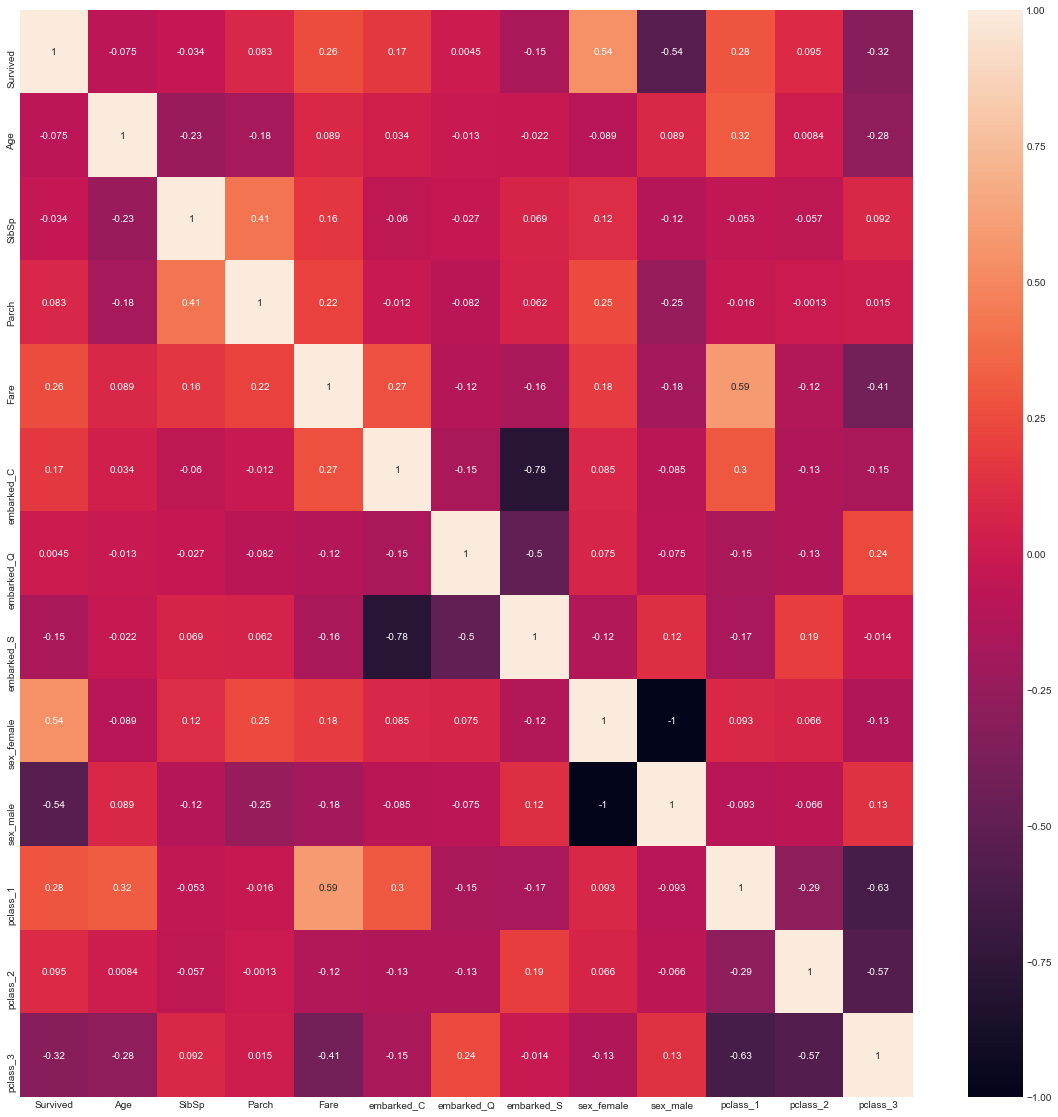

In [74]:
correlations = df_con_enc.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

###  Machine Learning Models

In [75]:
# seperate data
# Seclect the dataframe we want to use first for predictions
selected_df = df_con_enc

In [76]:
selected_df.head()

Survived   Age  SibSp  Parch     Fare  embarked_C  embarked_Q  embarked_S  \
0         0  22.0      1      0   7.2500           0           0           1   
1         1  38.0      1      0  71.2833           1           0           0   
2         1  26.0      0      0   7.9250           0           0           1   
3         1  35.0      1      0  53.1000           0           0           1   
4         0  35.0      0      0   8.0500           0           0           1   

   sex_female  sex_male  pclass_1  pclass_2  pclass_3  
0           0         1         0         0         1  
1           1         0         1         0         0  
2           1         0         0         0         1  
3           1         0         1         0         0  
4           0         1         0         0         1

In [77]:

# Split the dataframe into data and labels
X_train = selected_df.drop('Survived', axis=1) # data
y_train = selected_df.Survived # labels

In [78]:
# Shape of the data (without labels)
X_train.shape

(889, 12)

In [79]:
X_train.head()

Age  SibSp  Parch     Fare  embarked_C  embarked_Q  embarked_S  \
0  22.0      1      0   7.2500           0           0           1   
1  38.0      1      0  71.2833           1           0           0   
2  26.0      0      0   7.9250           0           0           1   
3  35.0      1      0  53.1000           0           0           1   
4  35.0      0      0   8.0500           0           0           1   

   sex_female  sex_male  pclass_1  pclass_2  pclass_3  
0           0         1         0         0         1  
1           1         0         1         0         0  
2           1         0         0         0         1  
3           1         0         1         0         0  
4           0         1         0         0         1

In [80]:
# Shape of the labels
y_train.shape

(889,)

In [81]:
y_train

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
30     0
31     1
32     1
33     0
34     0
35     0
36     1
37     0
38     0
39     1
40     0
41     0
42     0
43     1
44     1
45     0
46     0
47     1
48     0
49     0
50     0
51     0
52     1
53     1
54     0
55     1
56     1
57     0
58     1
59     0
60     0
62     0
63     0
64     0
65     1
66     1
67     0
68     1
69     0
70     0
71     0
72     0
73     0
74     1
75     0
76     0
77     0
78     1
79     1
80     0
81     1
82     1
83     0
84     1
85     1
86     0
87     0
88     1
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     1
98     1
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    1
107    1
108    0
109    1
110    0
111    0
1

### machine learning algorithms

In [82]:
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

#### Logistic Regression

In [83]:

# Logistic Regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 80.43
Accuracy CV 10-Fold: 79.87
Running Time: 0:00:02.666250


In [84]:
train_pred_log

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,

#### Random Forest

In [ ]:
""""
## Alternate method

from sklearn.model_selection import train_test_split
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size = 0.25)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

X_train_split.head()
y_train_split.head()
model = RandomForestClassifier()
model.fit(X_train_split, y_train_split)
y_pred = model.predict(X_test_split)

#Testing Set Performance
cm = confusion_matrix(y_pred, y_test_split)
sns.heatmap(cm, annot=True)

print("Accuracy {} %".format( 100 * accuracy_score(y_pred, y_test_split)))

print(classification_report(y_test_split, y_pred))
""""

In [86]:
# Random Forest
start_time = time.time()
train_pred_rf, acc_rf, acc_cv_rf = fit_ml_algo(RandomForestClassifier(), 
                                               X_train,
                                               y_train,
                                               10)
rf_time = (time.time() - start_time)
print("Accuracy: %s" % acc_rf)
print("Accuracy CV 10-Fold: %s" % acc_cv_rf)
print("Running Time: %s" % datetime.timedelta(seconds=rf_time))

Accuracy: 98.2
Accuracy CV 10-Fold: 80.65
Running Time: 0:00:01.143620


#### K-Nearest Neighbours

In [87]:

# k-Nearest Neighbours
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                  X_train, 
                                                  y_train, 
                                                  10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 82.11
Accuracy CV 10-Fold: 71.09
Running Time: 0:00:00.140806


#### Gaussian Naive Bayes

In [88]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), 
                                                                      X_train, 
                                                                      y_train, 
                                                                           10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 78.52
Accuracy CV 10-Fold: 78.4
Running Time: 0:00:00.082082


#### Linear Support Vector Machines (SVC)

In [89]:

# Linear SVC
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                X_train, 
                                                                y_train, 
                                                                10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 78.07
Accuracy CV 10-Fold: 72.89
Running Time: 0:00:00.217693


#### Stochastic Gradient Descent

In [90]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(), 
                                                  X_train, 
                                                  y_train,
                                                  10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 65.24
Accuracy CV 10-Fold: 67.04
Running Time: 0:00:00.100503


#### Decision Tree Classifier

In [91]:
 #Decision Tree Classifier
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 98.2
Accuracy CV 10-Fold: 77.5
Running Time: 0:00:00.077299


#### Gradient Boost Trees

In [92]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       X_train, 
                                                                       y_train,
                                                                       10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 89.2
Accuracy CV 10-Fold: 83.01
Running Time: 0:00:00.615872


#### CatBoost Algorithm

In [93]:
# View the data for the CatBoost model
X_train.head()

Age  SibSp  Parch     Fare  embarked_C  embarked_Q  embarked_S  \
0  22.0      1      0   7.2500           0           0           1   
1  38.0      1      0  71.2833           1           0           0   
2  26.0      0      0   7.9250           0           0           1   
3  35.0      1      0  53.1000           0           0           1   
4  35.0      0      0   8.0500           0           0           1   

   sex_female  sex_male  pclass_1  pclass_2  pclass_3  
0           0         1         0         0         1  
1           1         0         1         0         0  
2           1         0         0         0         1  
3           1         0         1         0         0  
4           0         1         0         0         1

In [94]:
# View the labels for the CatBoost model
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [95]:
# Define the categorical features for the CatBoost model
cat_features = np.where(X_train.dtypes != np.float)[0]
cat_features

array([ 1,  2,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [96]:
# Use the CatBoost Pool() function to pool together the training data and categorical feature labels
train_pool = Pool(X_train, 
                  y_train,
                  cat_features)

In [97]:

y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [98]:
# CatBoost model definition
catboost_model = CatBoostClassifier(iterations=1000,
                                    custom_loss=['Accuracy'],
                                    loss_function='Logloss')

# Fit CatBoost model
catboost_model.fit(train_pool,
                   plot=True)

# CatBoost accuracy
acc_catboost = round(catboost_model.score(X_train, y_train) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.009797
0:	learn: 0.6873212	total: 182ms	remaining: 3m 1s
1:	learn: 0.6829498	total: 194ms	remaining: 1m 36s
2:	learn: 0.6779695	total: 220ms	remaining: 1m 13s
3:	learn: 0.6723342	total: 252ms	remaining: 1m 2s
4:	learn: 0.6666852	total: 270ms	remaining: 53.8s
5:	learn: 0.6611263	total: 289ms	remaining: 47.9s
6:	learn: 0.6558915	total: 307ms	remaining: 43.5s
7:	learn: 0.6502407	total: 326ms	remaining: 40.5s
8:	learn: 0.6443115	total: 361ms	remaining: 39.7s
9:	learn: 0.6413214	total: 363ms	remaining: 35.9s
10:	learn: 0.6364215	total: 380ms	remaining: 34.2s
11:	learn: 0.6309709	total: 410ms	remaining: 33.7s
12:	learn: 0.6264148	total: 424ms	remaining: 32.2s
13:	learn: 0.6212365	total: 441ms	remaining: 31s
14:	learn: 0.6167318	total: 453ms	remaining: 29.7s
15:	learn: 0.6118775	total: 465ms	remaining: 28.6s
16:	learn: 0.6076579	total: 473ms	remaining: 27.3s
17:	learn: 0.6051730	total: 484ms	remaining: 26.4s
18:	learn: 0.6009280	total: 498ms	remaining: 25.7s
19:	learn: 

164:	learn: 0.3994034	total: 3.34s	remaining: 16.9s
165:	learn: 0.3991642	total: 3.35s	remaining: 16.8s
166:	learn: 0.3991402	total: 3.35s	remaining: 16.7s
167:	learn: 0.3987767	total: 3.36s	remaining: 16.7s
168:	learn: 0.3985634	total: 3.37s	remaining: 16.6s
169:	learn: 0.3981374	total: 3.41s	remaining: 16.6s
170:	learn: 0.3978033	total: 3.42s	remaining: 16.6s
171:	learn: 0.3977280	total: 3.45s	remaining: 16.6s
172:	learn: 0.3973401	total: 3.46s	remaining: 16.5s
173:	learn: 0.3969788	total: 3.47s	remaining: 16.5s
174:	learn: 0.3962417	total: 3.49s	remaining: 16.5s
175:	learn: 0.3960041	total: 3.5s	remaining: 16.4s
176:	learn: 0.3959461	total: 3.51s	remaining: 16.3s
177:	learn: 0.3957616	total: 3.53s	remaining: 16.3s
178:	learn: 0.3956915	total: 3.53s	remaining: 16.2s
179:	learn: 0.3954244	total: 3.54s	remaining: 16.1s
180:	learn: 0.3952557	total: 3.56s	remaining: 16.1s
181:	learn: 0.3951886	total: 3.58s	remaining: 16.1s
182:	learn: 0.3951037	total: 3.58s	remaining: 16s
183:	learn: 0.3

333:	learn: 0.3624744	total: 6.11s	remaining: 12.2s
334:	learn: 0.3622708	total: 6.12s	remaining: 12.1s
335:	learn: 0.3620152	total: 6.14s	remaining: 12.1s
336:	learn: 0.3618384	total: 6.16s	remaining: 12.1s
337:	learn: 0.3618104	total: 6.17s	remaining: 12.1s
338:	learn: 0.3618087	total: 6.17s	remaining: 12s
339:	learn: 0.3617222	total: 6.19s	remaining: 12s
340:	learn: 0.3617217	total: 6.19s	remaining: 12s
341:	learn: 0.3613649	total: 6.21s	remaining: 12s
342:	learn: 0.3611448	total: 6.23s	remaining: 11.9s
343:	learn: 0.3610454	total: 6.23s	remaining: 11.9s
344:	learn: 0.3609999	total: 6.26s	remaining: 11.9s
345:	learn: 0.3609949	total: 6.26s	remaining: 11.8s
346:	learn: 0.3609918	total: 6.26s	remaining: 11.8s
347:	learn: 0.3609107	total: 6.27s	remaining: 11.8s
348:	learn: 0.3607629	total: 6.29s	remaining: 11.7s
349:	learn: 0.3606595	total: 6.29s	remaining: 11.7s
350:	learn: 0.3606314	total: 6.29s	remaining: 11.6s
351:	learn: 0.3604147	total: 6.32s	remaining: 11.6s
352:	learn: 0.360239

507:	learn: 0.3450139	total: 8.49s	remaining: 8.23s
508:	learn: 0.3450139	total: 8.5s	remaining: 8.2s
509:	learn: 0.3449021	total: 8.51s	remaining: 8.18s
510:	learn: 0.3448161	total: 8.52s	remaining: 8.15s
511:	learn: 0.3447268	total: 8.53s	remaining: 8.13s
512:	learn: 0.3444740	total: 8.54s	remaining: 8.11s
513:	learn: 0.3444347	total: 8.54s	remaining: 8.08s
514:	learn: 0.3443347	total: 8.55s	remaining: 8.05s
515:	learn: 0.3442146	total: 8.57s	remaining: 8.04s
516:	learn: 0.3440978	total: 8.59s	remaining: 8.02s
517:	learn: 0.3439776	total: 8.6s	remaining: 8s
518:	learn: 0.3437618	total: 8.63s	remaining: 7.99s
519:	learn: 0.3437573	total: 8.63s	remaining: 7.96s
520:	learn: 0.3436196	total: 8.65s	remaining: 7.95s
521:	learn: 0.3434121	total: 8.66s	remaining: 7.93s
522:	learn: 0.3433085	total: 8.68s	remaining: 7.92s
523:	learn: 0.3432184	total: 8.69s	remaining: 7.89s
524:	learn: 0.3431806	total: 8.7s	remaining: 7.87s
525:	learn: 0.3429053	total: 8.72s	remaining: 7.86s
526:	learn: 0.34283

677:	learn: 0.3278599	total: 11.3s	remaining: 5.35s
678:	learn: 0.3277184	total: 11.3s	remaining: 5.33s
679:	learn: 0.3277102	total: 11.3s	remaining: 5.31s
680:	learn: 0.3276896	total: 11.3s	remaining: 5.29s
681:	learn: 0.3274310	total: 11.3s	remaining: 5.28s
682:	learn: 0.3273831	total: 11.3s	remaining: 5.26s
683:	learn: 0.3273678	total: 11.3s	remaining: 5.24s
684:	learn: 0.3273010	total: 11.3s	remaining: 5.21s
685:	learn: 0.3271778	total: 11.4s	remaining: 5.2s
686:	learn: 0.3271044	total: 11.4s	remaining: 5.19s
687:	learn: 0.3270730	total: 11.4s	remaining: 5.17s
688:	learn: 0.3270622	total: 11.4s	remaining: 5.15s
689:	learn: 0.3270515	total: 11.4s	remaining: 5.12s
690:	learn: 0.3270396	total: 11.4s	remaining: 5.1s
691:	learn: 0.3270027	total: 11.4s	remaining: 5.08s
692:	learn: 0.3269029	total: 11.4s	remaining: 5.07s
693:	learn: 0.3268556	total: 11.4s	remaining: 5.04s
694:	learn: 0.3268408	total: 11.5s	remaining: 5.03s
695:	learn: 0.3266279	total: 11.5s	remaining: 5.01s
696:	learn: 0.

849:	learn: 0.3127071	total: 14.3s	remaining: 2.52s
850:	learn: 0.3124395	total: 14.3s	remaining: 2.5s
851:	learn: 0.3123580	total: 14.3s	remaining: 2.48s
852:	learn: 0.3122447	total: 14.3s	remaining: 2.47s
853:	learn: 0.3121831	total: 14.3s	remaining: 2.45s
854:	learn: 0.3121390	total: 14.4s	remaining: 2.44s
855:	learn: 0.3120873	total: 14.4s	remaining: 2.42s
856:	learn: 0.3120327	total: 14.4s	remaining: 2.4s
857:	learn: 0.3119122	total: 14.4s	remaining: 2.39s
858:	learn: 0.3118092	total: 14.4s	remaining: 2.37s
859:	learn: 0.3117044	total: 14.5s	remaining: 2.35s
860:	learn: 0.3115920	total: 14.5s	remaining: 2.34s
861:	learn: 0.3114954	total: 14.5s	remaining: 2.33s
862:	learn: 0.3112633	total: 14.6s	remaining: 2.31s
863:	learn: 0.3111758	total: 14.6s	remaining: 2.29s
864:	learn: 0.3111710	total: 14.6s	remaining: 2.27s
865:	learn: 0.3110455	total: 14.6s	remaining: 2.26s
866:	learn: 0.3108585	total: 14.6s	remaining: 2.24s
867:	learn: 0.3108250	total: 14.6s	remaining: 2.23s
868:	learn: 0.

##### Perform CatBoost cross-validation

In [99]:
# How long will this take?
start_time = time.time()

# Set params for cross-validation as same as initial model
cv_params = catboost_model.get_params()

# Run the cross-validation for 10-folds (same as the other models)
cv_data = cv(train_pool,
             cv_params,
             fold_count=10,
             plot=True)

# How long did it take?
catboost_time = (time.time() - start_time)

# CatBoost CV results save into a dataframe (cv_data), let's withdraw the maximum accuracy score
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6739220	test: 0.6745972	best: 0.6745972 (0)	total: 479ms	remaining: 7m 58s
1:	learn: 0.6613490	test: 0.6622429	best: 0.6622429 (1)	total: 884ms	remaining: 7m 21s
2:	learn: 0.6451930	test: 0.6467503	best: 0.6467503 (2)	total: 1.34s	remaining: 7m 24s
3:	learn: 0.6300496	test: 0.6322710	best: 0.6322710 (3)	total: 1.73s	remaining: 7m 11s
4:	learn: 0.6152964	test: 0.6187291	best: 0.6187291 (4)	total: 2.2s	remaining: 7m 17s
5:	learn: 0.6013709	test: 0.6058864	best: 0.6058864 (5)	total: 2.71s	remaining: 7m 28s
6:	learn: 0.5896469	test: 0.5948912	best: 0.5948912 (6)	total: 3.2s	remaining: 7m 33s
7:	learn: 0.5777776	test: 0.5833529	best: 0.5833529 (7)	total: 3.62s	remaining: 7m 29s
8:	learn: 0.5695218	test: 0.5754409	best: 0.5754409 (8)	total: 3.98s	remaining: 7m 18s
9:	learn: 0.5587458	test: 0.5656366	best: 0.5656366 (9)	total: 4.4s	remaining: 7m 15s
10:	learn: 0.5501891	test: 0.5578115	best: 0.5578115 (10)	total: 4.83s	remaining: 7m 14s
11:	learn: 0.5415407	test: 0.5495174	best: 0

93:	learn: 0.3692476	test: 0.4240791	best: 0.4240791 (93)	total: 40.1s	remaining: 6m 26s
94:	learn: 0.3686133	test: 0.4241098	best: 0.4240791 (93)	total: 40.8s	remaining: 6m 28s
95:	learn: 0.3681651	test: 0.4239266	best: 0.4239266 (95)	total: 41s	remaining: 6m 26s
96:	learn: 0.3675162	test: 0.4238093	best: 0.4238093 (96)	total: 41.3s	remaining: 6m 24s
97:	learn: 0.3671039	test: 0.4238596	best: 0.4238093 (96)	total: 41.7s	remaining: 6m 23s
98:	learn: 0.3667948	test: 0.4238324	best: 0.4238093 (96)	total: 42s	remaining: 6m 22s
99:	learn: 0.3662839	test: 0.4237673	best: 0.4237673 (99)	total: 42.4s	remaining: 6m 21s
100:	learn: 0.3658910	test: 0.4236490	best: 0.4236490 (100)	total: 42.9s	remaining: 6m 21s
101:	learn: 0.3654010	test: 0.4234770	best: 0.4234770 (101)	total: 43.3s	remaining: 6m 21s
102:	learn: 0.3650586	test: 0.4235953	best: 0.4234770 (101)	total: 43.7s	remaining: 6m 20s
103:	learn: 0.3645923	test: 0.4233711	best: 0.4233711 (103)	total: 44.2s	remaining: 6m 20s
104:	learn: 0.364

184:	learn: 0.3366598	test: 0.4195110	best: 0.4193447 (170)	total: 1m 16s	remaining: 5m 36s
185:	learn: 0.3363647	test: 0.4193946	best: 0.4193447 (170)	total: 1m 16s	remaining: 5m 35s
186:	learn: 0.3360142	test: 0.4193848	best: 0.4193447 (170)	total: 1m 16s	remaining: 5m 34s
187:	learn: 0.3358213	test: 0.4193324	best: 0.4193324 (187)	total: 1m 17s	remaining: 5m 34s
188:	learn: 0.3355859	test: 0.4193252	best: 0.4193252 (188)	total: 1m 17s	remaining: 5m 33s
189:	learn: 0.3354084	test: 0.4193000	best: 0.4193000 (189)	total: 1m 18s	remaining: 5m 33s
190:	learn: 0.3350247	test: 0.4194814	best: 0.4193000 (189)	total: 1m 18s	remaining: 5m 32s
191:	learn: 0.3347800	test: 0.4195712	best: 0.4193000 (189)	total: 1m 18s	remaining: 5m 31s
192:	learn: 0.3344822	test: 0.4194765	best: 0.4193000 (189)	total: 1m 19s	remaining: 5m 31s
193:	learn: 0.3342946	test: 0.4195751	best: 0.4193000 (189)	total: 1m 19s	remaining: 5m 31s
194:	learn: 0.3341145	test: 0.4194349	best: 0.4193000 (189)	total: 1m 19s	remain

274:	learn: 0.3111594	test: 0.4190100	best: 0.4189727 (236)	total: 1m 58s	remaining: 5m 12s
275:	learn: 0.3110169	test: 0.4190089	best: 0.4189727 (236)	total: 1m 59s	remaining: 5m 12s
276:	learn: 0.3107301	test: 0.4189110	best: 0.4189110 (276)	total: 1m 59s	remaining: 5m 12s
277:	learn: 0.3104187	test: 0.4189902	best: 0.4189110 (276)	total: 1m 59s	remaining: 5m 11s
278:	learn: 0.3101635	test: 0.4190903	best: 0.4189110 (276)	total: 2m	remaining: 5m 11s
279:	learn: 0.3099453	test: 0.4190550	best: 0.4189110 (276)	total: 2m 1s	remaining: 5m 11s
280:	learn: 0.3095895	test: 0.4190903	best: 0.4189110 (276)	total: 2m 1s	remaining: 5m 11s
281:	learn: 0.3092243	test: 0.4189950	best: 0.4189110 (276)	total: 2m 2s	remaining: 5m 10s
282:	learn: 0.3089262	test: 0.4189339	best: 0.4189110 (276)	total: 2m 2s	remaining: 5m 10s
283:	learn: 0.3086147	test: 0.4187167	best: 0.4187167 (283)	total: 2m 2s	remaining: 5m 10s
284:	learn: 0.3082511	test: 0.4185513	best: 0.4185513 (284)	total: 2m 3s	remaining: 5m 9s

364:	learn: 0.2818542	test: 0.4174613	best: 0.4172564 (346)	total: 2m 49s	remaining: 4m 54s
365:	learn: 0.2814913	test: 0.4175287	best: 0.4172564 (346)	total: 2m 49s	remaining: 4m 53s
366:	learn: 0.2811463	test: 0.4174833	best: 0.4172564 (346)	total: 2m 49s	remaining: 4m 53s
367:	learn: 0.2809452	test: 0.4175377	best: 0.4172564 (346)	total: 2m 50s	remaining: 4m 53s
368:	learn: 0.2807661	test: 0.4176810	best: 0.4172564 (346)	total: 2m 51s	remaining: 4m 52s
369:	learn: 0.2804824	test: 0.4178665	best: 0.4172564 (346)	total: 2m 51s	remaining: 4m 52s
370:	learn: 0.2802284	test: 0.4179491	best: 0.4172564 (346)	total: 2m 52s	remaining: 4m 52s
371:	learn: 0.2799349	test: 0.4178255	best: 0.4172564 (346)	total: 2m 52s	remaining: 4m 51s
372:	learn: 0.2795495	test: 0.4176178	best: 0.4172564 (346)	total: 2m 53s	remaining: 4m 51s
373:	learn: 0.2792494	test: 0.4177283	best: 0.4172564 (346)	total: 2m 54s	remaining: 4m 51s
374:	learn: 0.2789628	test: 0.4177294	best: 0.4172564 (346)	total: 2m 54s	remain

454:	learn: 0.2555095	test: 0.4173047	best: 0.4170022 (382)	total: 3m 36s	remaining: 4m 19s
455:	learn: 0.2552305	test: 0.4171193	best: 0.4170022 (382)	total: 3m 37s	remaining: 4m 18s
456:	learn: 0.2549816	test: 0.4171314	best: 0.4170022 (382)	total: 3m 37s	remaining: 4m 18s
457:	learn: 0.2547584	test: 0.4171601	best: 0.4170022 (382)	total: 3m 38s	remaining: 4m 18s
458:	learn: 0.2544949	test: 0.4171896	best: 0.4170022 (382)	total: 3m 38s	remaining: 4m 17s
459:	learn: 0.2542098	test: 0.4172200	best: 0.4170022 (382)	total: 3m 39s	remaining: 4m 17s
460:	learn: 0.2538790	test: 0.4173512	best: 0.4170022 (382)	total: 3m 39s	remaining: 4m 16s
461:	learn: 0.2536746	test: 0.4173530	best: 0.4170022 (382)	total: 3m 40s	remaining: 4m 16s
462:	learn: 0.2534775	test: 0.4173498	best: 0.4170022 (382)	total: 3m 40s	remaining: 4m 16s
463:	learn: 0.2532233	test: 0.4170913	best: 0.4170022 (382)	total: 3m 41s	remaining: 4m 15s
464:	learn: 0.2530143	test: 0.4172240	best: 0.4170022 (382)	total: 3m 42s	remain

544:	learn: 0.2340058	test: 0.4177102	best: 0.4170022 (382)	total: 4m 32s	remaining: 3m 47s
545:	learn: 0.2337800	test: 0.4179064	best: 0.4170022 (382)	total: 4m 33s	remaining: 3m 47s
546:	learn: 0.2335153	test: 0.4179260	best: 0.4170022 (382)	total: 4m 33s	remaining: 3m 46s
547:	learn: 0.2333369	test: 0.4180270	best: 0.4170022 (382)	total: 4m 34s	remaining: 3m 46s
548:	learn: 0.2331585	test: 0.4178654	best: 0.4170022 (382)	total: 4m 34s	remaining: 3m 45s
549:	learn: 0.2329167	test: 0.4178786	best: 0.4170022 (382)	total: 4m 35s	remaining: 3m 45s
550:	learn: 0.2327180	test: 0.4179714	best: 0.4170022 (382)	total: 4m 36s	remaining: 3m 45s
551:	learn: 0.2325698	test: 0.4180067	best: 0.4170022 (382)	total: 4m 36s	remaining: 3m 44s
552:	learn: 0.2323283	test: 0.4178913	best: 0.4170022 (382)	total: 4m 37s	remaining: 3m 44s
553:	learn: 0.2320547	test: 0.4180640	best: 0.4170022 (382)	total: 4m 38s	remaining: 3m 44s
554:	learn: 0.2319672	test: 0.4180596	best: 0.4170022 (382)	total: 4m 38s	remain

634:	learn: 0.2159126	test: 0.4189306	best: 0.4170022 (382)	total: 5m 30s	remaining: 3m 9s
635:	learn: 0.2157042	test: 0.4188421	best: 0.4170022 (382)	total: 5m 30s	remaining: 3m 9s
636:	learn: 0.2155431	test: 0.4189048	best: 0.4170022 (382)	total: 5m 31s	remaining: 3m 8s
637:	learn: 0.2153338	test: 0.4189553	best: 0.4170022 (382)	total: 5m 31s	remaining: 3m 8s
638:	learn: 0.2151403	test: 0.4189571	best: 0.4170022 (382)	total: 5m 32s	remaining: 3m 7s
639:	learn: 0.2150106	test: 0.4191177	best: 0.4170022 (382)	total: 5m 33s	remaining: 3m 7s
640:	learn: 0.2147459	test: 0.4191839	best: 0.4170022 (382)	total: 5m 33s	remaining: 3m 6s
641:	learn: 0.2145010	test: 0.4192218	best: 0.4170022 (382)	total: 5m 34s	remaining: 3m 6s
642:	learn: 0.2143981	test: 0.4192495	best: 0.4170022 (382)	total: 5m 34s	remaining: 3m 5s
643:	learn: 0.2142887	test: 0.4192420	best: 0.4170022 (382)	total: 5m 35s	remaining: 3m 5s
644:	learn: 0.2140838	test: 0.4194314	best: 0.4170022 (382)	total: 5m 35s	remaining: 3m 4s

724:	learn: 0.1997552	test: 0.4219637	best: 0.4170022 (382)	total: 6m 26s	remaining: 2m 26s
725:	learn: 0.1995663	test: 0.4219249	best: 0.4170022 (382)	total: 6m 27s	remaining: 2m 26s
726:	learn: 0.1994620	test: 0.4219337	best: 0.4170022 (382)	total: 6m 28s	remaining: 2m 25s
727:	learn: 0.1993440	test: 0.4220755	best: 0.4170022 (382)	total: 6m 28s	remaining: 2m 25s
728:	learn: 0.1992037	test: 0.4220800	best: 0.4170022 (382)	total: 6m 28s	remaining: 2m 24s
729:	learn: 0.1990338	test: 0.4221917	best: 0.4170022 (382)	total: 6m 29s	remaining: 2m 24s
730:	learn: 0.1988166	test: 0.4221892	best: 0.4170022 (382)	total: 6m 30s	remaining: 2m 23s
731:	learn: 0.1986478	test: 0.4221313	best: 0.4170022 (382)	total: 6m 31s	remaining: 2m 23s
732:	learn: 0.1984567	test: 0.4220511	best: 0.4170022 (382)	total: 6m 31s	remaining: 2m 22s
733:	learn: 0.1982984	test: 0.4219707	best: 0.4170022 (382)	total: 6m 32s	remaining: 2m 22s
734:	learn: 0.1980985	test: 0.4219917	best: 0.4170022 (382)	total: 6m 32s	remain

814:	learn: 0.1861684	test: 0.4254251	best: 0.4170022 (382)	total: 7m 27s	remaining: 1m 41s
815:	learn: 0.1860738	test: 0.4255284	best: 0.4170022 (382)	total: 7m 27s	remaining: 1m 40s
816:	learn: 0.1859118	test: 0.4256155	best: 0.4170022 (382)	total: 7m 29s	remaining: 1m 40s
817:	learn: 0.1857855	test: 0.4255831	best: 0.4170022 (382)	total: 7m 29s	remaining: 1m 40s
818:	learn: 0.1855967	test: 0.4256225	best: 0.4170022 (382)	total: 7m 30s	remaining: 1m 39s
819:	learn: 0.1855026	test: 0.4256918	best: 0.4170022 (382)	total: 7m 31s	remaining: 1m 39s
820:	learn: 0.1852984	test: 0.4257345	best: 0.4170022 (382)	total: 7m 32s	remaining: 1m 38s
821:	learn: 0.1850972	test: 0.4256419	best: 0.4170022 (382)	total: 7m 32s	remaining: 1m 38s
822:	learn: 0.1849248	test: 0.4256438	best: 0.4170022 (382)	total: 7m 33s	remaining: 1m 37s
823:	learn: 0.1848038	test: 0.4257029	best: 0.4170022 (382)	total: 7m 34s	remaining: 1m 36s
824:	learn: 0.1846582	test: 0.4259048	best: 0.4170022 (382)	total: 7m 35s	remain

904:	learn: 0.1741384	test: 0.4286139	best: 0.4170022 (382)	total: 8m 33s	remaining: 53.9s
905:	learn: 0.1740487	test: 0.4287098	best: 0.4170022 (382)	total: 8m 34s	remaining: 53.4s
906:	learn: 0.1739508	test: 0.4288075	best: 0.4170022 (382)	total: 8m 35s	remaining: 52.8s
907:	learn: 0.1738418	test: 0.4288439	best: 0.4170022 (382)	total: 8m 36s	remaining: 52.3s
908:	learn: 0.1737191	test: 0.4288612	best: 0.4170022 (382)	total: 8m 36s	remaining: 51.7s
909:	learn: 0.1735818	test: 0.4289095	best: 0.4170022 (382)	total: 8m 37s	remaining: 51.2s
910:	learn: 0.1735007	test: 0.4289110	best: 0.4170022 (382)	total: 8m 38s	remaining: 50.6s
911:	learn: 0.1733580	test: 0.4289983	best: 0.4170022 (382)	total: 8m 39s	remaining: 50.1s
912:	learn: 0.1731898	test: 0.4290411	best: 0.4170022 (382)	total: 8m 39s	remaining: 49.5s
913:	learn: 0.1730729	test: 0.4291265	best: 0.4170022 (382)	total: 8m 40s	remaining: 49s
914:	learn: 0.1729123	test: 0.4291401	best: 0.4170022 (382)	total: 8m 41s	remaining: 48.4s
9

995:	learn: 0.1633485	test: 0.4313720	best: 0.4170022 (382)	total: 9m 39s	remaining: 2.33s
996:	learn: 0.1632393	test: 0.4313020	best: 0.4170022 (382)	total: 9m 39s	remaining: 1.74s
997:	learn: 0.1631592	test: 0.4313873	best: 0.4170022 (382)	total: 9m 40s	remaining: 1.16s
998:	learn: 0.1630614	test: 0.4314024	best: 0.4170022 (382)	total: 9m 41s	remaining: 582ms
999:	learn: 0.1629431	test: 0.4314493	best: 0.4170022 (382)	total: 9m 42s	remaining: 0us


In [102]:
# Print out the CatBoost model metrics
print("---CatBoost Metrics---")
print("Accuracy: {}".format(acc_catboost))
print("Accuracy cross-validation 10-Fold: {}".format(acc_cv_catboost))
print("Running Time: {}".format(datetime.timedelta(seconds=catboost_time)))

---CatBoost Metrics---
Accuracy: 86.39
Accuracy cross-validation 10-Fold: 83.35
Running Time: 0:09:46.687596


### Results

#### Regular accuracy scores

In [103]:
    models = pd.DataFrame({'Model': ['KNN', 'Logistic Regression', 'Random Forest','Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_knn, 
        acc_log,
        acc_rf,
        acc_gaussian, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbt,
        acc_catboost
    ]})
print("---Regular Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Regular Accuracy Scores---


Model  Score
2               Random Forest  98.20
6               Decision Tree  98.20
7     Gradient Boosting Trees  89.20
8                    CatBoost  86.39
0                         KNN  82.11
1         Logistic Regression  80.43
3                 Naive Bayes  78.52
5                  Linear SVC  78.07
4  Stochastic Gradient Decent  65.24

#### Cross-validation Accuracy

In [105]:
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression','Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,
        acc_cv_rf,
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbt,
        acc_cv_catboost
    ]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


Model  Score
8                    CatBoost  83.35
7     Gradient Boosting Trees  83.01
2               Random Forest  80.65
1         Logistic Regression  79.87
3                 Naive Bayes  78.40
6               Decision Tree  77.50
5                  Linear SVC  72.89
0                         KNN  71.09
4  Stochastic Gradient Decent  67.04

### Feature Importance

In [106]:
def feature_importance(model, data):
    """
    Function to show which features are most important in the model.
    ::param_model:: Which model to use?
    ::param_data:: What data to use?
    """
    fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    _ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
    return fea_imp
    #plt.savefig('catboost_feature_importance.png')

imp         col
5    0.681570  embarked_Q
4    1.431562  embarked_C
10   1.676595    pclass_2
6    1.816641  embarked_S
9    3.362808    pclass_1
11   9.558674    pclass_3
2    9.672403       Parch
1   10.448403       SibSp
3   13.241464        Fare
0   13.714498         Age
8   16.654342    sex_male
7   17.741039  sex_female

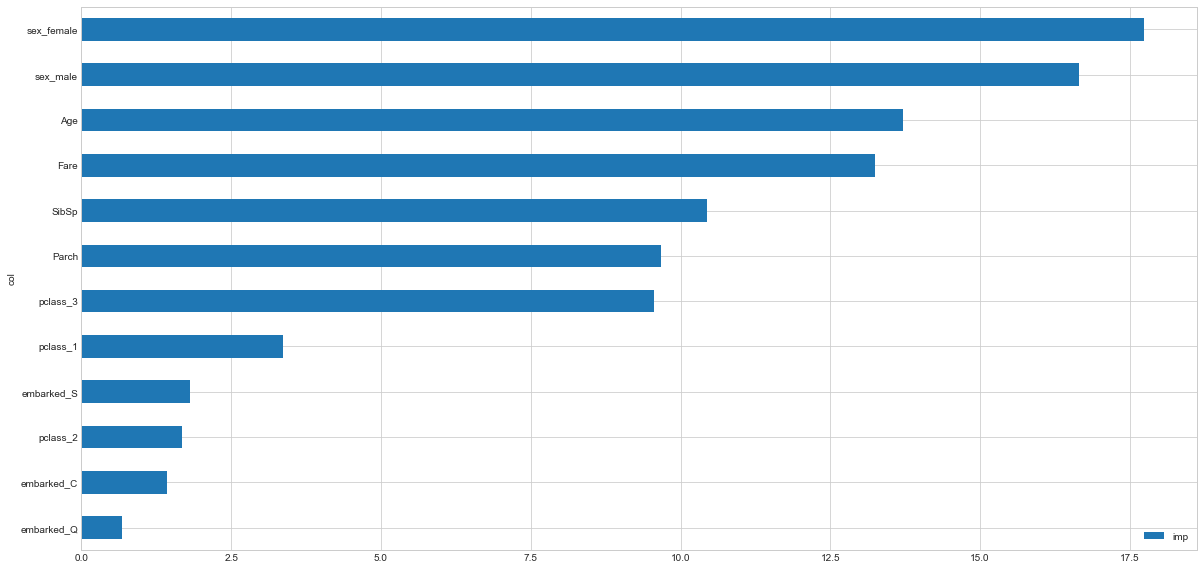

In [107]:
# Plot the feature importance scores
feature_importance(catboost_model, X_train)

##### Why would you want feature importance?
Feature importance shows how much each feature contributed to the model.

You could take this information and remove features which don't contribute much to reduce dimenstionality (and save compute).

You could improve features which don't offer much to the overall model.

Or you could improve features which offer more to the model. In this case, there aren't many ways you could improve sex as it's already a binary.

Feature importance figures also show people who may not be familiar with the problem what features of their data are most important when it comes to making predictions with machine learning models.

##### Precision and Recall
Precision and recall are two metrics which are used for cases where you have have an imbalanced classification problem.

For example, you may have 100,000 people and only 1 of them gets a certain disease. If your model predicts that all people don't have the disease, it only misses 1 in 100,000 so its accuracy is 99.999%. But this isn't really helpful.

This is where precision an recall come in.

Recall = a metric which measures a models ability to find all the relevant cases in a dataset.

Recall would be the models ability to find the 1 person in 100,000 who has the disease.

Precision = a metric which measures a models ability to correctly identify only relevant instances.

In our example, Precision would be if the model found the 1 person who had the disease, did they actually have the disease.

Combining the precision and recall, gives an F1 score.

These metrics will all fall between 0 and 1, with a higher value being better.

Although, they don't necessarily need to come into play for our Titantic problem, they're worth remembering for your future work.

In [108]:
metrics = ['Precision', 'Recall', 'F1', 'AUC']

eval_metrics = catboost_model.eval_metrics(train_pool,
                                           metrics=metrics,
                                           plot=True)

for metric in metrics:
    print(str(metric)+": {}".format(np.mean(eval_metrics[metric])))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Precision: 0.8649477793872391
Recall: 0.7150294117647058
F1: 0.7826411832739438
AUC: 0.9019617914925533


### Submission

In [109]:
# We need our test dataframe to look like this one
X_train.head()

Age  SibSp  Parch     Fare  embarked_C  embarked_Q  embarked_S  \
0  22.0      1      0   7.2500           0           0           1   
1  38.0      1      0  71.2833           1           0           0   
2  26.0      0      0   7.9250           0           0           1   
3  35.0      1      0  53.1000           0           0           1   
4  35.0      0      0   8.0500           0           0           1   

   sex_female  sex_male  pclass_1  pclass_2  pclass_3  
0           0         1         0         0         1  
1           1         0         1         0         0  
2           1         0         0         0         1  
3           1         0         1         0         0  
4           0         1         0         0         1

In [110]:
# Our test dataframe has some columns our model hasn't been trained on
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [111]:
# One hot encode the columns in the test data frame (like X_train)
test_embarked_one_hot = pd.get_dummies(test['Embarked'], 
                                       prefix='embarked')

test_sex_one_hot = pd.get_dummies(test['Sex'], 
                                prefix='sex')

test_plcass_one_hot = pd.get_dummies(test['Pclass'], 
                                   prefix='pclass')

In [112]:

# Combine the test one hot encoded columns with test
test = pd.concat([test, 
                  test_embarked_one_hot, 
                  test_sex_one_hot, 
                  test_plcass_one_hot], axis=1)

In [113]:
# Let's look at test, it should have one hot encoded columns now
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  embarked_C  \
0  34.5      0      0   330911   7.8292   NaN        Q           0   
1  47.0      1      0   363272   7.0000   NaN        S           0   
2  62.0      0      0   240276   9.6875   NaN        Q           0   
3  27.0      0      0   315154   8.6625   NaN        S           0   
4  22.0      1      1  3101298  12.2875   NaN        S           0   

   embarked_Q  embarked_S  sex_female  sex_male  pclass_1  pclass_2  pclass_3  
0           1           0           0         1         0         0         1  
1           0           1           1         0         0         0         1  
2           1           0           0         1         0         1         0  
3           0           1           0         1         0         0         1  
4           0           1           1         0         0         0         1

In [114]:
# Create a list of columns to be used for the predictions
wanted_test_columns = X_train.columns
wanted_test_columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'embarked_C', 'embarked_Q',
       'embarked_S', 'sex_female', 'sex_male', 'pclass_1', 'pclass_2',
       'pclass_3'],
      dtype='object')

In [115]:
# Make a prediction using the CatBoost model on the wanted columns
predictions = catboost_model.predict(test[wanted_test_columns])

In [116]:
# Our predictions array is comprised of 0's and 1's (Survived or Did Not Survive)
predictions[:20]

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0],
      dtype=int64)

In [117]:
# Create a submisison dataframe and append the relevant columns
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = predictions # our model predictions on the test dataset
submission

PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
5            897         0
6            898         1
7            899         0
8            900         1
9            901         0
10           902         1
11           903         0
12           904         1
13           905         0
14           906         1
15           907         1
16           908         0
17           909         0
18           910         0
19           911         0
20           912         0
21           913         0
22           914         1
23           915         1
24           916         1
25           917         0
26           918         1
27           919         0
28           920         0
29           921         1
30           922         0
31           923         0
32           924         0
33           925         1
34           926         0
35           927         0
36           928         1
37           929         0
38           930         0
39           931         1
40           932         0
41           933         1
42           934         0
43           935         1
44           936         1
45           937         0
46           938         0
47           939         1
48           940         1
49           941         1
50           942         0
51           943         0
52           944         1
53           945         1
54           946         1
55           947         0
56           948         0
57           949         0
58           950         1
59           951         1
60           952         0
61           953         0
62           954         0
63           955         1
64           956         1
65           957         1
66           958         1
67           959         0
68           960         0
69           961         1
70           962         1
71           963         0
72           964         1
73           965         0
74           966         1
75           967         0
76           968         1
77           969         1
78           970         0
79           971         1
80           972         1
81           973         0
82           974         0
83           975         1
84           976         1
85           977         1
86           978         1
87           979         1
88           980         1
89           981         1
90           982         0
91           983         1
92           984         1
93           985         1
94           986         0
95           987         0
96           988         1
97           989         0
98           990         1
99           991         0
100          992         1
101          993         0
102          994         1
103          995         0
104          996         1
105          997         0
106          998         0
107          999         1
108         1000         1
109         1001         0
110         1002         0
111         1003         1
112         1004         1
113         1005         1
114         1006         1
115         1007         0
116         1008         1
117         1009         1
118         1010         0
119         1011         1
120         1012         1
121         1013         1
122         1014         1
123         1015         0
124         1016         1
125         1017         1
126         1018         0
127         1019         1
128         1020         0
129         1021         0
130         1022         0
131         1023         0
132         1024         1
133         1025         1
134         1026         0
135         1027         0
136         1028         0
137         1029         0
138         1030         0
139         1031         0
140         1032         0
141         1033         1
142         1034         0
143         1035         0
144         1036         0
145         1037         0
146         1038         1
147      

In [118]:
# What does our submission have to look like?
gender_submission.head()

PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

In [119]:
# Let's convert our submission dataframe 'Survived' column to ints
submission['Survived'] = submission['Survived'].astype(int)
print('Converted Survived column to integers.')

Converted Survived column to integers.


In [120]:
# Are our test and submission dataframes the same length?
if len(submission) == len(test):
    print("Submission dataframe is the same length as test ({} rows).".format(len(submission)))
else:
    print("Dataframes mismatched, won't be able to submit to Kaggle.")

Submission dataframe is the same length as test (418 rows).


In [121]:
# Convert submisison dataframe to csv for submission to csv 
# for Kaggle submisison
submission.to_csv('catboost_submission_AGEincluded.csv', index=False)
print('Submission CSV is ready!')

Submission CSV is ready!


In [122]:
# Check the submission csv to make sure it's in the right format
submissions_check = pd.read_csv("catboost_submission.csv")
submissions_check.head()

PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1